# **Machine Learning Finals**
## **Define the problem**

#### **Dataset**
The dataset we will be using for this report would be the IMDB dataset from the internet movie database. The dataset contains 50,000 reviews of movies, with the dataset being split into 25,000 reviews for the training set and 25,000 for the testing set. Within each set for our training and testing data, it contains an equal amount of positive and negative reviews. The dataset has already been preprocessed from a sequence of words to integers, with each integers representing a word in a dictionary.

#### **Type of problem**
The type of problem that we will be working with this dataset is a binary classification problem. A binary classification problem is a form of supervised learning where it aims to predict a catergory (two classes) that the data belongs to. The application in which binary classification is used could be in the form of email spam detections, quality control if a product's specification has been met.


#### **Objective**
Our objective for this report is to develop a machine learning model using neural network to accurately classify the movie reviews from the dataset as a positive or negative review based off the reviews left by users. The reviews will be in a text format, hence we would need to do some data conversion for our neural network models into binary matrix form.

## **Measure of success**
We will be using metrics such as accuracy score to measure the accuracy of our models and their effectiveness in to handle the imbalanced classes.

## **Evaluation protocol**
For the evaluation protocol, we will be using a hold-out set. We will split our data into a training set, validation set and finally a test set to evaluate our model's final performance after fine tuning.

### Importing libraries and dataset

In [1]:
#loading the dataset
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
#training data
train_data[0][:5]

[1, 14, 22, 16, 43]

In [2]:
#ensuring no word index exceeds 10k words
max([max(sequence) for sequence in train_data])

9999

In [4]:
#dictionary mapping strings to integer index
word_index = imdb.get_word_index()
#create dictionary to store mapped integer back to corresponding word
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
#joins into single string
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## **Preparing data for neural network**

In [3]:
import numpy as np
import math

#turning into vectors
def vectorize(sequence, dimension = 10000):
  #initialized with zeros with shape based of length of sequence and dimension
  results = np.zeros((len(sequence), dimension))
  for i, sequence in enumerate(sequence):
        results[i, sequence] = 1.

  return results

#vectorize training data
x_train = vectorize(train_data)
#vectorize test data
x_test = vectorize(test_data)

In [6]:
#samples
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [4]:
#vectorizing labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

# **Baseline model**

In [5]:
#adding the model layers
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
#validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [7]:
from keras import optimizers

#training our model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

orig_history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose = 0)

In [11]:
history_dict = orig_history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [8]:
#import matplot library
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#function to plot out grpah
def plot_graph(model_history, type_metrics, ax):

  history = model_history.history
  if type_metrics == "loss":
    #loss
    training = history['loss']
    validation = history['val_loss']

  elif type_metrics == "accuracy":
    #accuracy
    training = history['accuracy']
    validation = history['val_accuracy']
    #percentage format for accuracy
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))


  epochs = range(1, len(training) + 1)

  #plot model
  ax.plot(epochs, training, 'bo', label= f'Training {type_metrics}')
  ax.plot(epochs, validation, 'r', label= f'Validation {type_metrics}')

  ax.set_title(f'Training and validation {type_metrics}')
  #x-axis label
  ax.set_xlabel('Epochs')
  #y-axis label
  ax.set_ylabel(f'{type_metrics}')

  #display legend
  ax.legend()

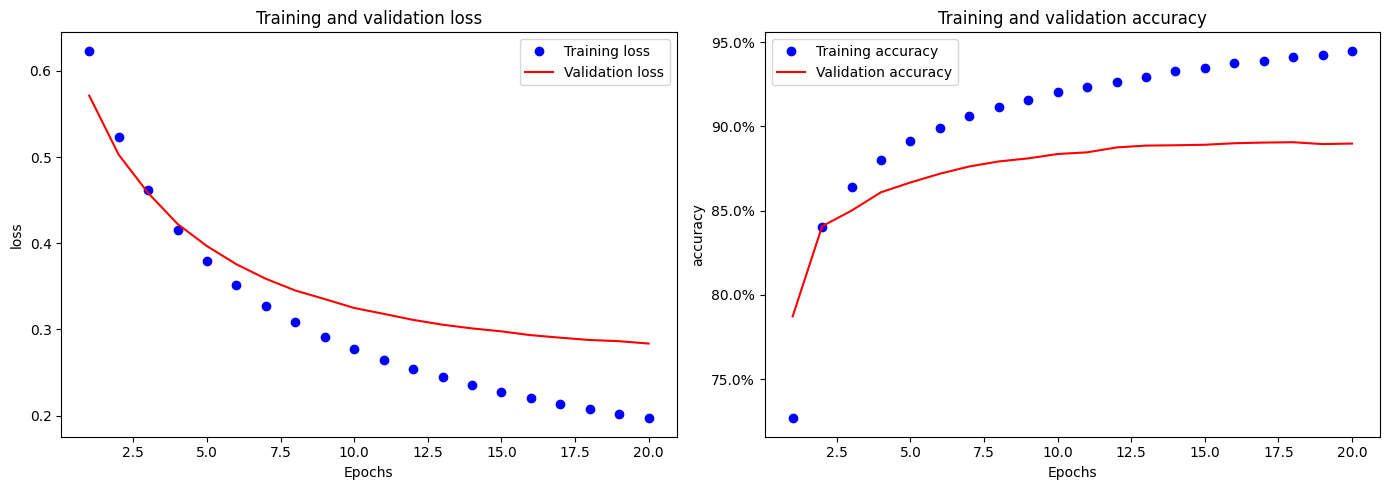

In [13]:
plt.figure(figsize=(14,5))

ax1 = plt.subplot(1, 2, 1)
#baseline loss
plot_graph(orig_history, "loss", ax1)

ax2 = plt.subplot(1, 2, 2)
#baseline accuracy
plot_graph(orig_history, "accuracy", ax2)

plt.tight_layout()
plt.show()

# **Beating the baseline model**

In [10]:
#better than baseline model
small_model = models.Sequential()
small_model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
small_model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
small_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

# Fit the model with your data
small_history = small_model.fit(x_train, y_train,
                          epochs=20,
                          batch_size=512,
                          validation_data=(x_val, y_val),
                          verbose = 0)

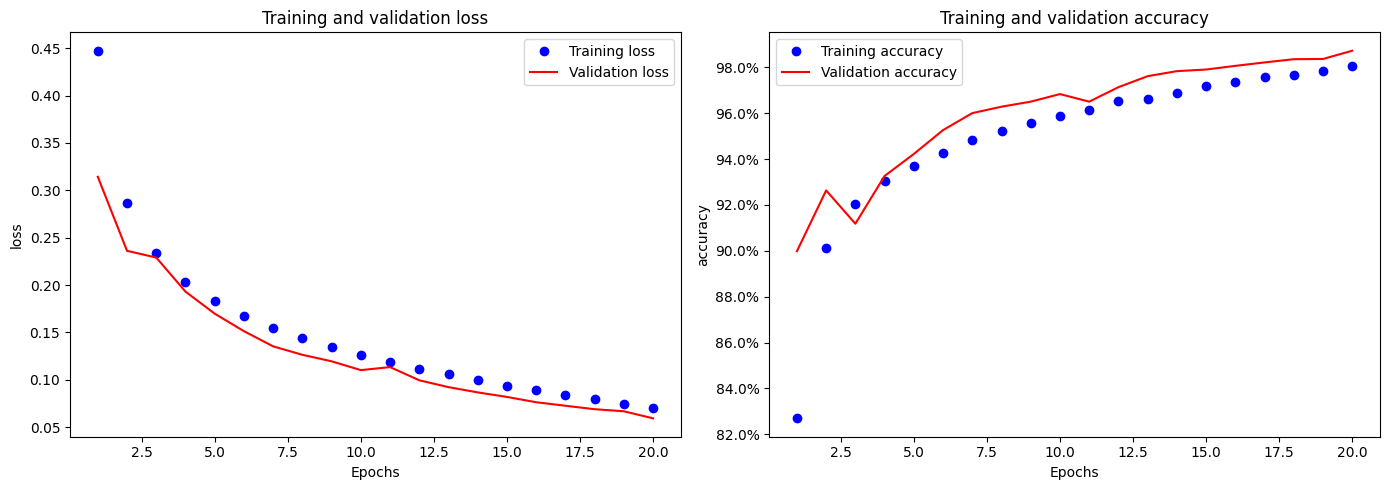

In [15]:
plt.figure(figsize=(14,5))

ax1 = plt.subplot(1, 2, 1)
#small model loss
plot_graph(small_history, "loss", ax1)

ax2 = plt.subplot(1, 2, 2)
#small model accuracy
plot_graph(small_history, "accuracy", ax2)

plt.tight_layout()
plt.show()

# **Scaling model up**


* Adding more depth (hidden layers)
* More neurons


In [16]:
#scale model up with more layers
model_scale = models.Sequential()
model_scale.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model_scale.add(layers.Dense(32, activation='relu'))
model_scale.add(layers.Dense(32, activation='relu'))
model_scale.add(layers.Dense(16, activation='relu'))
model_scale.add(layers.Dense(1, activation='sigmoid'))

#compiling
model_scale.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#fitting model
history_scale = model_scale.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose = 0)

history_test = history_scale.history

#evaluating model
validation_loss, validation_accuracy = model_scale.evaluate(x_val, y_val, verbose=0)

validation_accuracy = validation_accuracy * 100
#Display the performance
print(f'Validation Loss: {validation_loss}')
print(f'Validation Accuracy: {validation_accuracy}%')


Validation Loss: 0.8989008069038391
Validation Accuracy: 87.95999884605408%


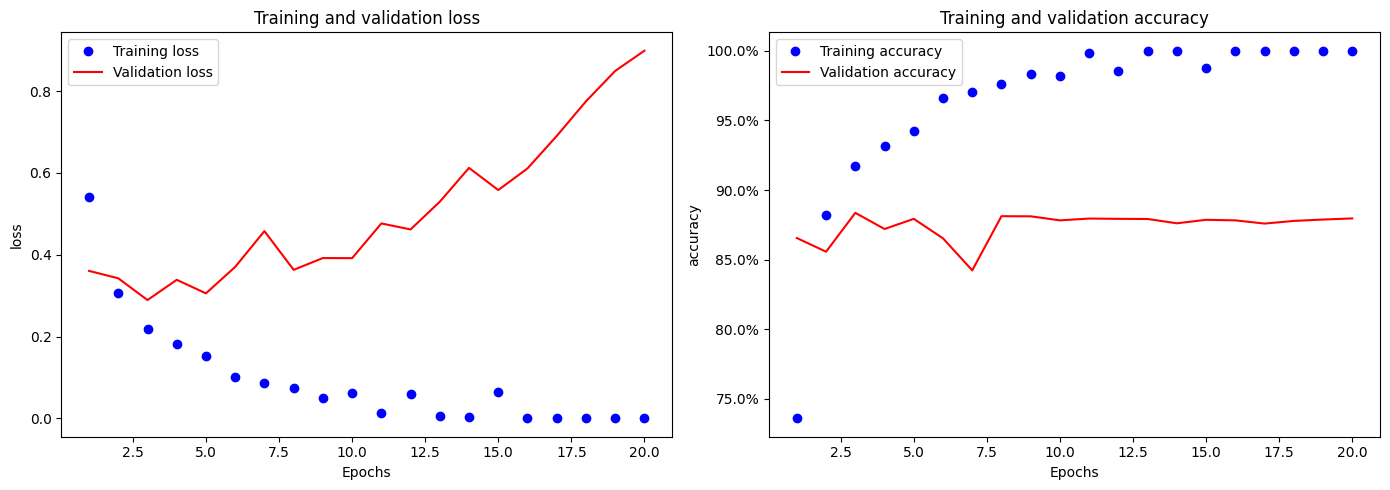

In [17]:
#plotting graph to see our training and validation loss
plt.figure(figsize=(14,5))

ax1 = plt.subplot(1, 2, 1)
#small model loss
plot_graph(history_scale, "loss", ax1)

ax2 = plt.subplot(1, 2, 2)
#small model accuracy
plot_graph(history_scale, "accuracy", ax2)

plt.tight_layout()
plt.show()



We can see that by scaling our model up and increasing the depth by having more hidden layers, it has also increase the complexity of our model. By scaling up we can see that the model has improved its performance with the validation loss significantly decreasing from the original baseline model.

However another issue with scaling up the model is it still has some overfitting issues as we can see in the graph, there is still some spikes in the validation loss with the increase of the number of epochs.

# **Regularizing model and tuning hyperparameters**

Overfitting occurs when our model does well in the training data but performs poorly in validation data or unseen data. The model learns the training data and its pattern too well such that when it comes to unseen data, it is not able to predict them properly or generalize to this new data as some of this patterns may not be present in the new data.

To reduce overfitting, we can apply **Regularization** which is a technique that applies a penalty to the model for its complexity towards the loss function.

The various regularization techniques are:
* Drop out method
* Regularization (L1 & L2)
* Elastic Net


## **Dropout**
Dropout is a technique in which randomly selected neurons are chosen to be ignored during our training phase. This ensures that the neural network will learn about the robust features in conjunction with the different subsets of neurons.

We will now be experimenting with the different dropout values to see which performs best.

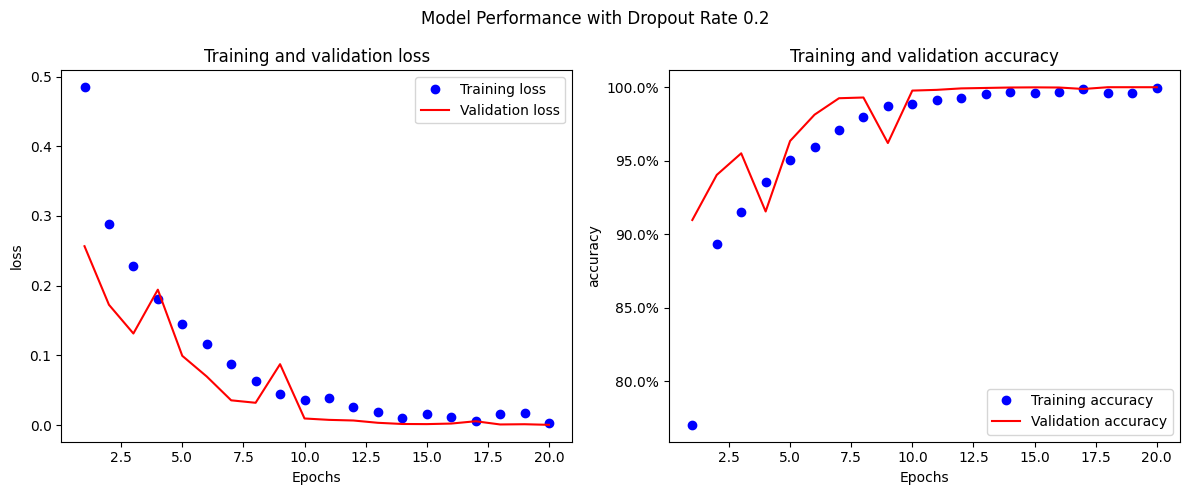

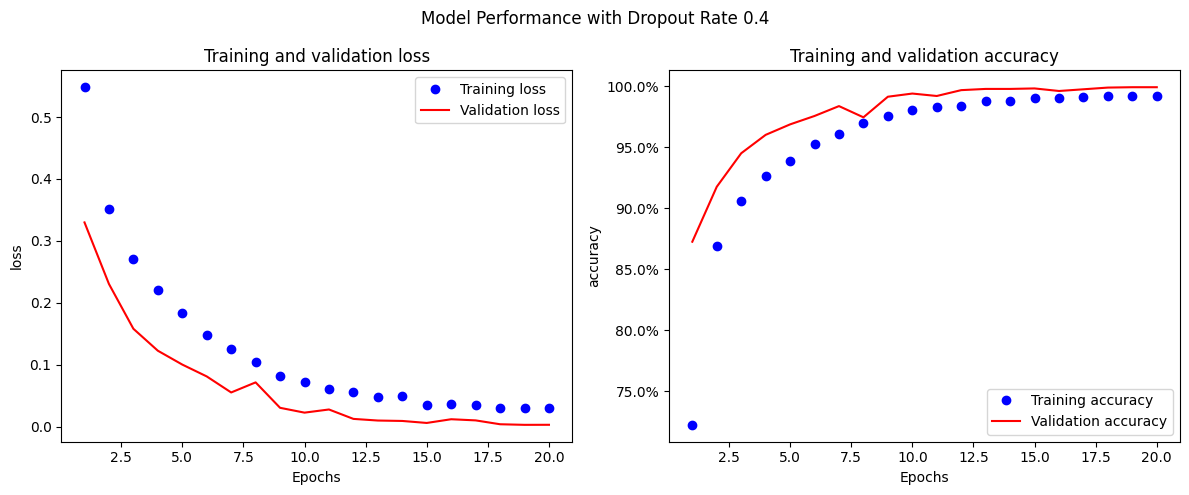

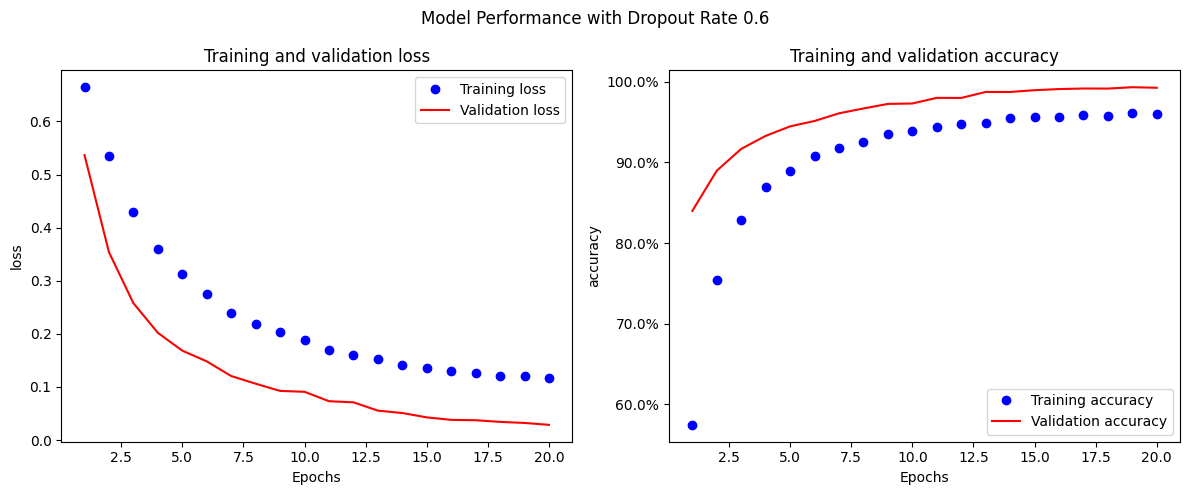

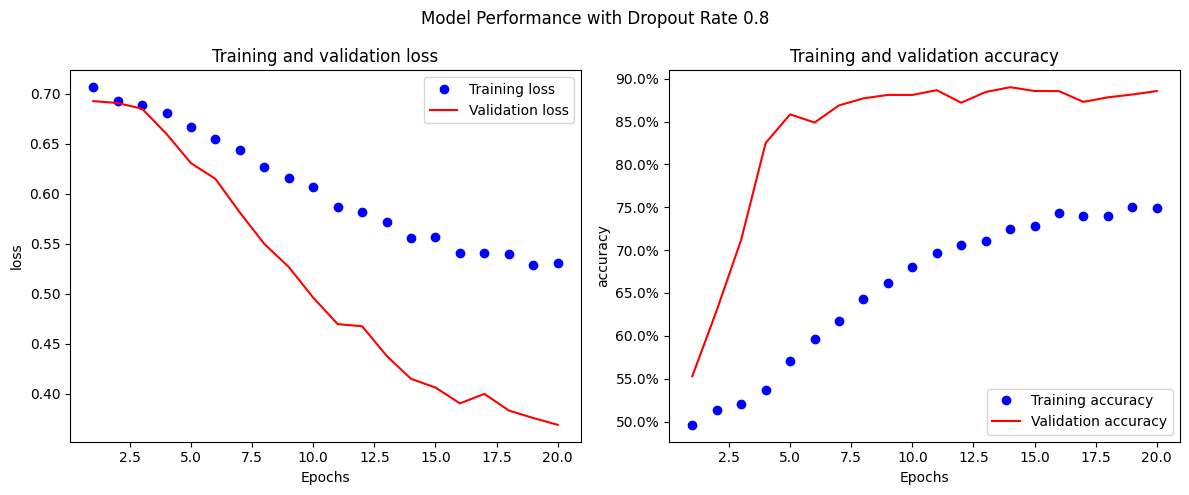

In [9]:
#range of dropout values to test
dropout_val = [0.2, 0.4, 0.6, 0.8]

#store the results of each dropout
dropout_performance = {}

for rate in dropout_val:
    #building the model with the specific dropout rate
    model_dropout = models.Sequential()
    model_dropout.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
    model_dropout.add(layers.Dropout(rate))
    model_dropout.add(layers.Dense(32, activation='relu'))
    model_dropout.add(layers.Dropout(rate))
    model_dropout.add(layers.Dense(16, activation='relu'))
    model_dropout.add(layers.Dropout(rate))
    model_dropout.add(layers.Dense(1, activation='sigmoid'))

    model_dropout.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    #training the model
    dropout_history = model_dropout.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=0)

    #evaluating model
    validation_loss, validation_accuracy = model_dropout.evaluate(x_val, y_val, verbose=0)

    #storing the loss and accuracy for each model
    dropout_performance[rate] = (validation_loss, validation_accuracy)

    #creating figure for each dropout rate
    plt.figure(figsize=(12,5))
    plt.suptitle(f'Model Performance with Dropout Rate {rate}')

    #plotting loss
    ax1 = plt.subplot(1, 2, 1)
    plot_graph(dropout_history, "loss", ax1)

    #plotting accuracy
    ax2 = plt.subplot(1, 2, 2)
    plot_graph(dropout_history, "accuracy", ax2)

    plt.tight_layout()
    plt.show()

In [11]:
#display result
for rate, (loss, accuracy) in dropout_performance.items():
    #convert to percentage
    accuracy_percent = accuracy * 100
    print(f"Dropout Rate: {rate}, Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy_percent:.1f}%")

Dropout Rate: 0.2, Validation Loss: 0.0003, Validation Accuracy: 100.0%
Dropout Rate: 0.4, Validation Loss: 0.0032, Validation Accuracy: 99.9%
Dropout Rate: 0.6, Validation Loss: 0.0287, Validation Accuracy: 99.3%
Dropout Rate: 0.8, Validation Loss: 0.3690, Validation Accuracy: 88.6%


**Dropout of 0.2**

For the model using a dropout rate of 0.2, it has a low validation loss score with the high validation accuracy. We can see that the training loss is steadily decreasing with the validation loss and the accuracy is also steadily increasing.

**Dropout of 0.4**

The training loss curve decreases with each epoch which would suggest that the model is learning and improving its performance on the training data. Also we can tell that the model is generalizing well from the validation loss curve decreasing with each epoch.

**Dropout of 0.6**

The validation loss curve decreases steadily without any spikes indicating that the model is generalizing well to unseen data. . Also the validation accuracy is increasing with a smooth curve which indicates the model performing well.

**Dropout of 0.8**

The training loss curve and validation loss curve starts off with a high loss rate but decreases substantially with the increase in the number of epochs. However in the training and validation accuracy, the curves have a much lower accuracy as compared to the other dropout rates, especially for the training curve. The gap between the training and validation curve is also quite big which would indicate some variance.

**Conclusion**

Overall, based on the different dropout rates explored, the most **optimal dropout rate would be 0.4** as there is a balance between the training and validation results with a low validation loss and high validation accuracy. This suggests that the overfitting is significantly reduced and the model generalizes well to unseen data.

## **Regularization L1 (lasso)**

L1 regularization is when we add a penalty equivalent to the absolute value of the magnitude of the coefficients.

We will now perform L1 regularization with the different

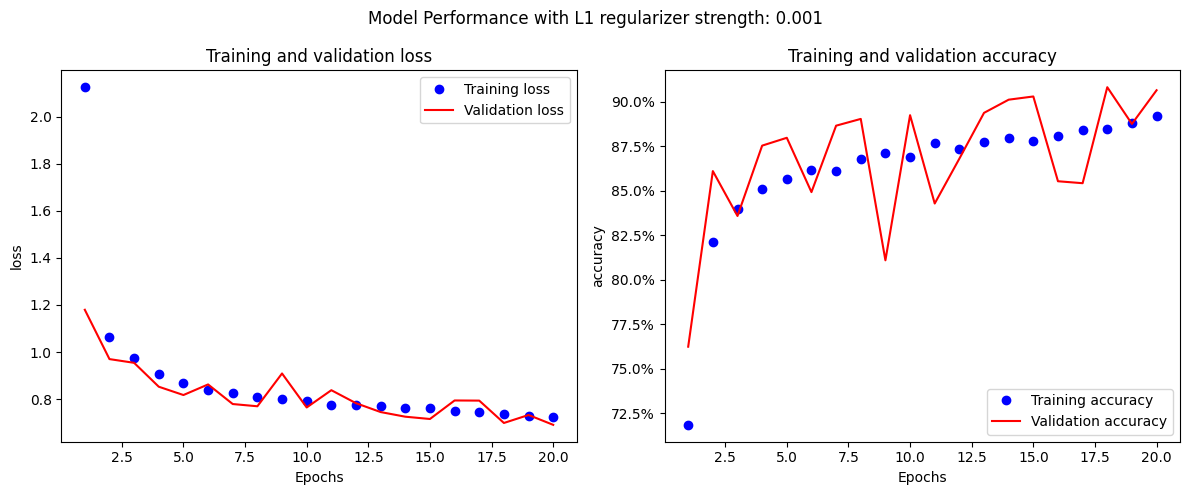

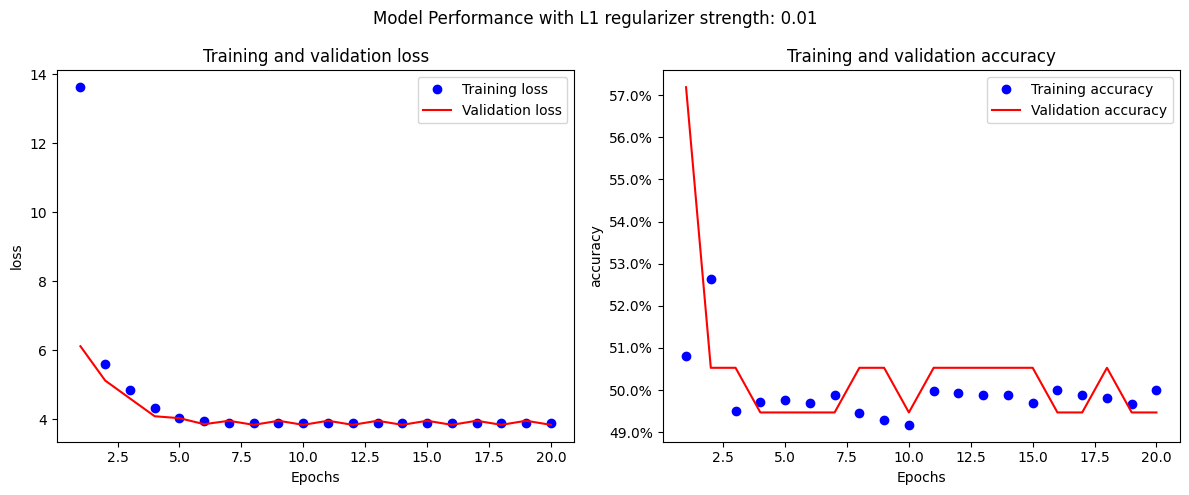

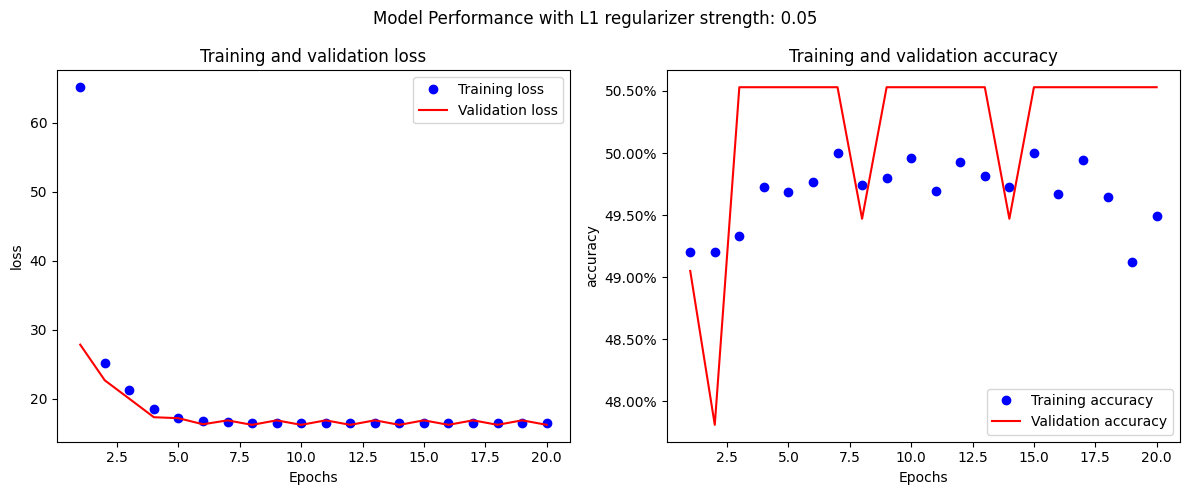

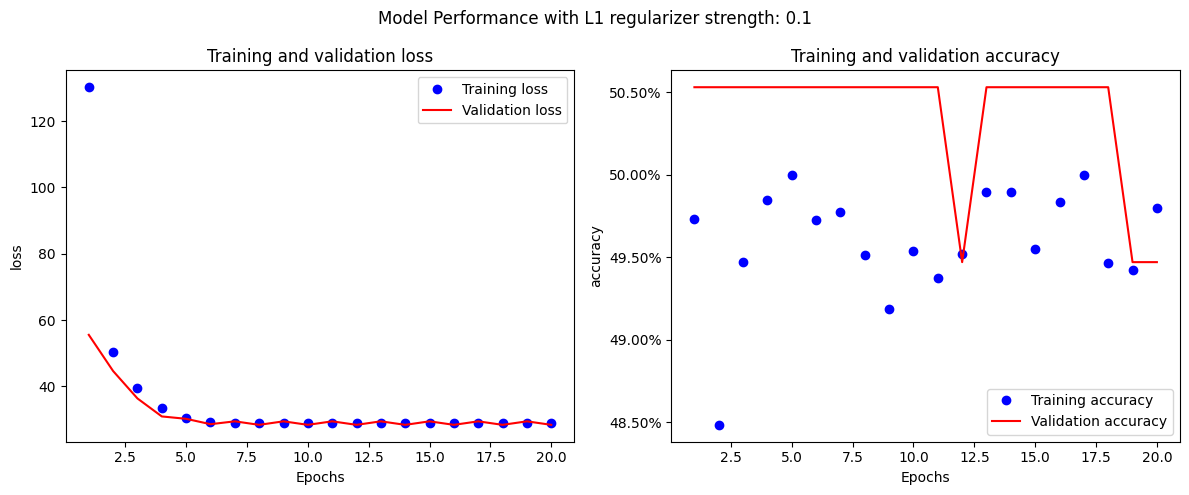

In [9]:
#import regularizer
from keras import regularizers

#regularizer values to test
l1regularizer_val = [0.001, 0.01, 0.05, 0.1]

#store results
L1_performance = {}

for strength in l1regularizer_val:
  #building model with specific regularizer values
  model_l1 = models.Sequential()
  model_l1.add(layers.Dense(64, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.l1(strength)))
  model_l1.add(layers.Dense(32, activation='relu' , kernel_regularizer=regularizers.l1(strength)))
  model_l1.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l1(strength)))
  model_l1.add(layers.Dense(1, activation='sigmoid'))

  #compile model
  model_l1.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

  #training the model
  l1_history = model_l1.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=0)

  #evaluating model
  validation_loss, validation_accuracy = model_l1.evaluate(x_val, y_val, verbose=0)

  #storing the loss and accuracy for each model
  L1_performance[strength] = (validation_loss, validation_accuracy)

  #creating figure for each dropout rate
  plt.figure(figsize=(12,5))
  plt.suptitle(f'Model Performance with L1 regularizer strength: {strength}')

  #plotting loss
  ax1 = plt.subplot(1, 2, 1)
  plot_graph(l1_history, "loss", ax1)

  #plotting accuracy
  ax2 = plt.subplot(1, 2, 2)
  plot_graph(l1_history, "accuracy", ax2)

  plt.tight_layout()
  plt.show()

In [10]:
#display result
for strength, (loss, accuracy) in L1_performance.items():
    #convert to percentage
    accuracy_percent = accuracy * 100
    print(f"L1 strength: {strength}, Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy_percent:.1f}%")

L1 strength: 0.001, Validation Loss: 0.6910, Validation Accuracy: 90.6%
L1 strength: 0.01, Validation Loss: 3.8329, Validation Accuracy: 49.5%
L1 strength: 0.05, Validation Loss: 16.2635, Validation Accuracy: 50.5%
L1 strength: 0.1, Validation Loss: 28.4259, Validation Accuracy: 49.5%


**Conclusion**

Based on the performance of these models using L1 regularization, it seems that generally the models perform badly with a low accuracy rate for the training and validation metrics. Regularization does not seem to reduce the overfitting of our model, with the validation accuracy fluctuating and the training accuracy also does not seem consistent. However the most of optimal value for L1 if we had to use it on the model would be **0.001** as it has the highest accuracy and lowest validation loss.

## **Regularization L2 (Ridge)**

L2 regularization is when we add a regularization term to our loss function, this term will penalise the large weights within our model and hence encourage simpler models that will generalize to unseen data.


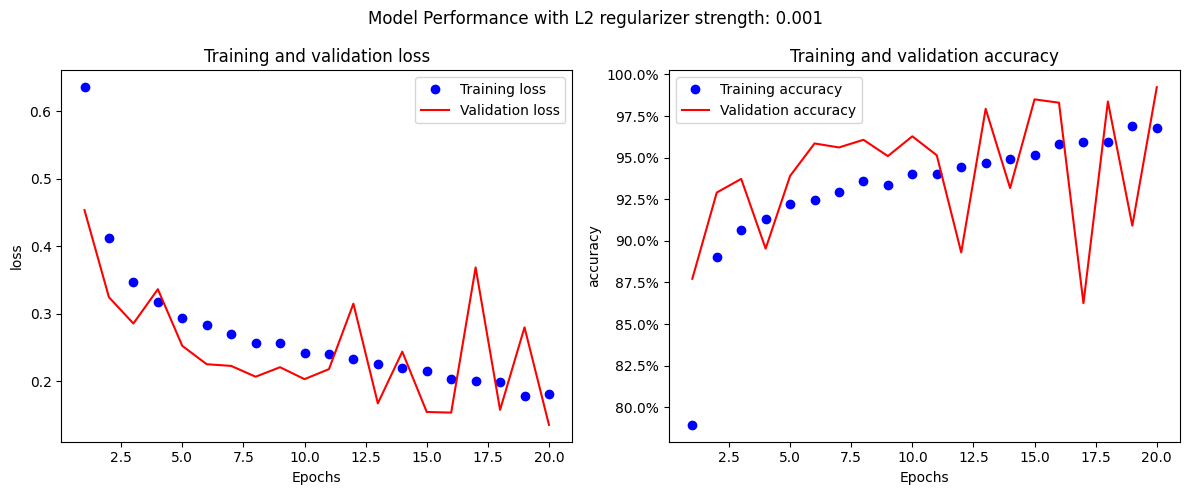

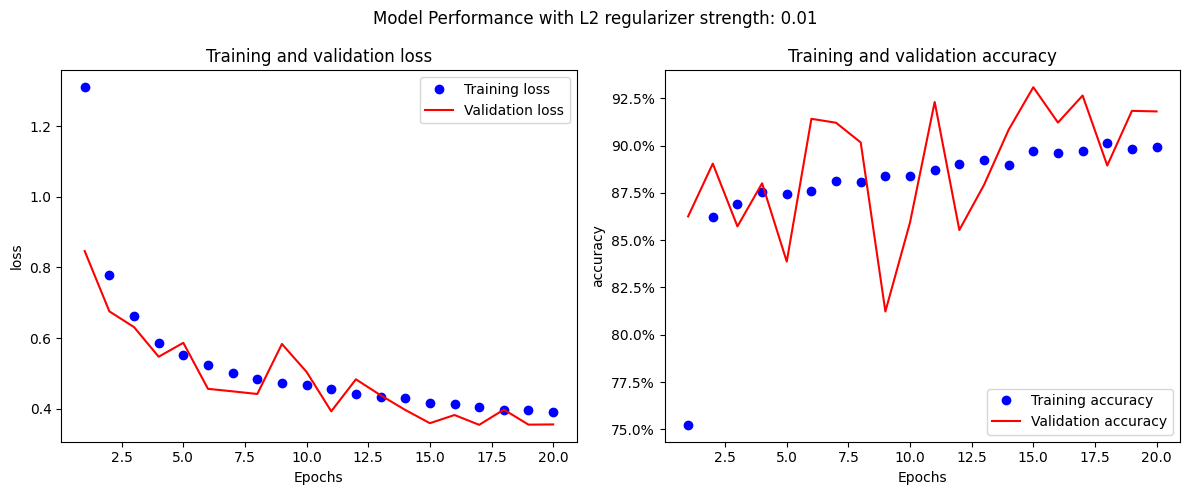

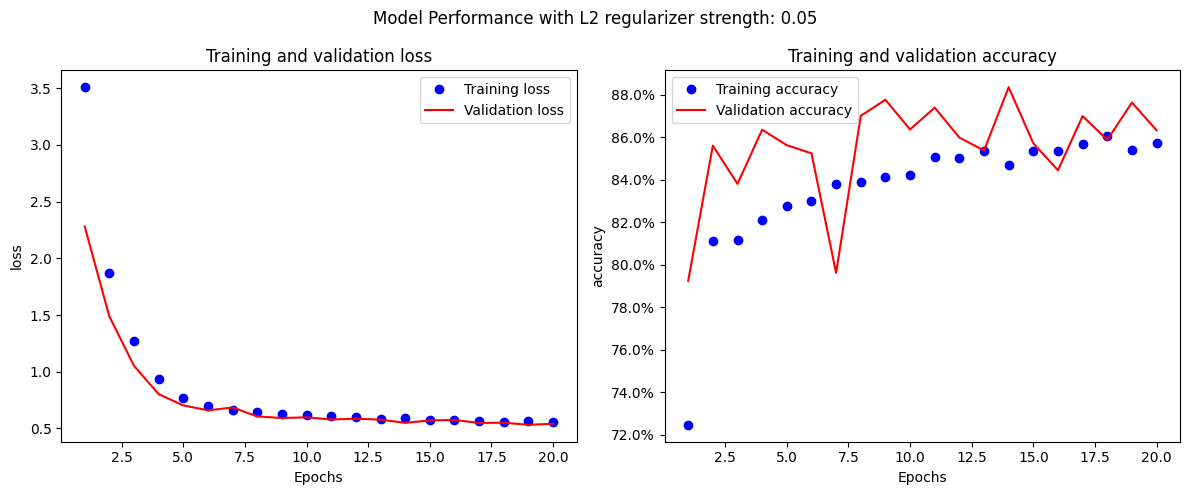

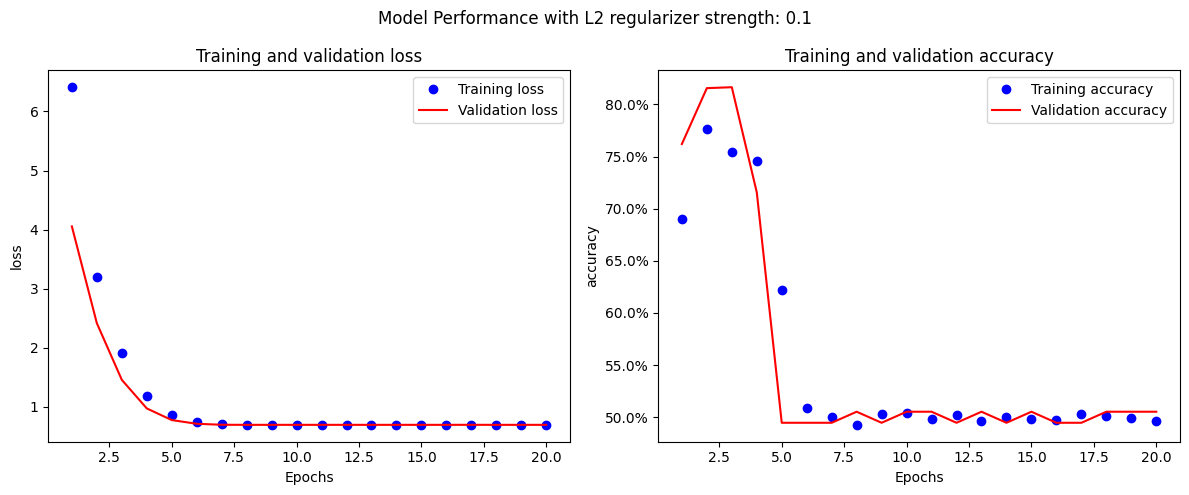

In [9]:
from keras import regularizers

#regularizer values to test
l2regularizer_val = [0.001, 0.01, 0.05, 0.1]

L2_performance = {}

for strength in l2regularizer_val:
  #building model with specific regularizer values
  model_l2 = models.Sequential()
  model_l2.add(layers.Dense(64, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.l2(strength)))
  model_l2.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(strength)))
  model_l2.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(strength)))
  model_l2.add(layers.Dense(1, activation='sigmoid'))

  #compile model
  model_l2.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

  #training the model
  l2_history = model_l2.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=0)

  #evaluating model
  validation_loss, validation_accuracy = model_l2.evaluate(x_val, y_val, verbose=0)

  #storing the loss and accuracy for each model
  L2_performance[strength] = (validation_loss, validation_accuracy)

  #creating figure for each regularization strength
  plt.figure(figsize=(12,5))
  plt.suptitle(f'Model Performance with L2 regularizer strength: {strength}')

  #plotting loss
  ax1 = plt.subplot(1, 2, 1)
  plot_graph(l2_history, "loss", ax1)

  #plotting accuracy
  ax2 = plt.subplot(1, 2, 2)
  plot_graph(l2_history, "accuracy", ax2)

  plt.tight_layout()
  plt.show()

In [10]:
#display result
for strength, (loss, accuracy) in L2_performance.items():
    #convert to percentage
    accuracy_percent = accuracy * 100
    print(f"L2 strength: {strength}, Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy_percent:.1f}%")

L2 strength: 0.001, Validation Loss: 0.1350, Validation Accuracy: 99.2%
L2 strength: 0.01, Validation Loss: 0.3556, Validation Accuracy: 91.8%
L2 strength: 0.05, Validation Loss: 0.5413, Validation Accuracy: 86.3%
L2 strength: 0.1, Validation Loss: 0.6932, Validation Accuracy: 50.5%


**Conclusion**

After exploring the various L2 regularization values, we can see that the most optimal value for our L2 regularization is **0.001**. It has the highest accuracy with the lowest validation loss from the results. However from the various graphs, we can see that the accuracy of our validation is not consistent with the sudden spikes and fall, this would suggest that the model is still overfitting and L2 regularization did not reduce the overfitting by alot.

## **Elastic Net with dropdown**

We shall now implement elastic net with dropdown, this would mean combining both L1 and L2 regularization with the dropdown technique.

Validation Loss: 0.7999787330627441
Validation Accuracy: 87.43000030517578%


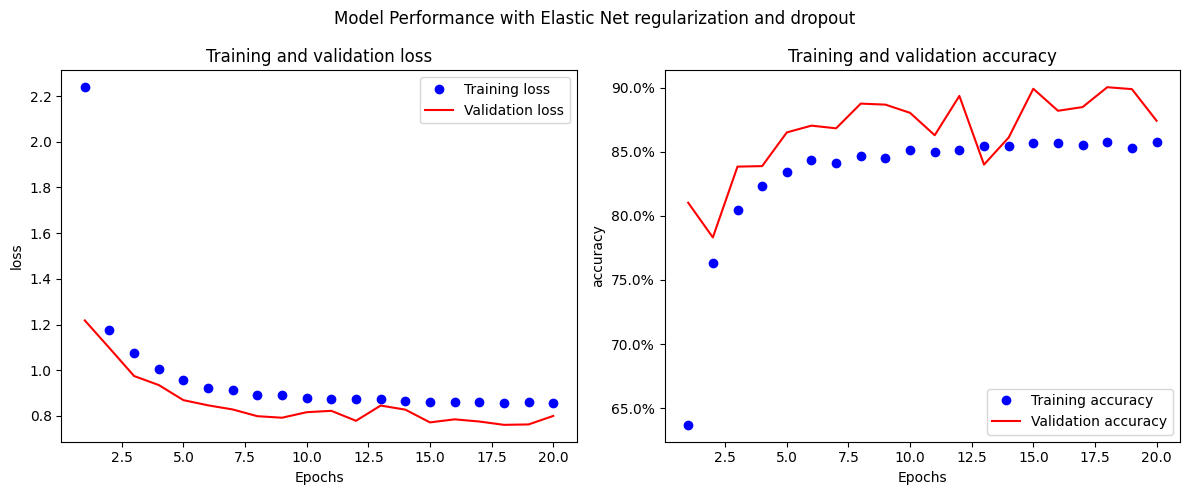

In [11]:
from keras import regularizers

#optimal values
L1 = 0.001
L2 = 0.001
dropout = 0.4

#building model with optimal values
model_elasticnet = models.Sequential()
model_elasticnet.add(layers.Dense(64, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.l1_l2(l1=L1, l2=L2)))
model_elasticnet.add(layers.Dropout(dropout))
model_elasticnet.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=L1, l2=L2)))
model_elasticnet.add(layers.Dropout(dropout))
model_elasticnet.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=L1, l2=L2)))
model_elasticnet.add(layers.Dropout(dropout))
model_elasticnet.add(layers.Dense(1, activation='sigmoid'))

#compile model
model_elasticnet.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

#training the model
elastic_history = model_elasticnet.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=0)

#evaluating model
validation_loss, validation_accuracy = model_elasticnet.evaluate(x_val, y_val, verbose=0)

validation_accuracy = validation_accuracy * 100
# Display the performance
print(f'Validation Loss: {validation_loss}')
print(f'Validation Accuracy: {validation_accuracy}')

#creating figure for each regularization strength
plt.figure(figsize=(12,5))
plt.suptitle('Model Performance with Elastic Net regularization and dropout')

#plotting loss
ax1 = plt.subplot(1, 2, 1)
plot_graph(elastic_history, "loss", ax1)

#plotting accuracy
ax2 = plt.subplot(1, 2, 2)
plot_graph(elastic_history, "accuracy", ax2)

plt.tight_layout()
plt.show()

**Conclusion**

After getting the optimal values for each of the regularizers and using them for the Elastic Net regularization, our model has an accuracy of about 87%. However if we were to look at the validation accuracy graph of the model, we can see that the validation accuracy is not of a smooth curve and has fluctuations throughout the training. This indicates that it is overfitting despite the Elastic net regularization applied to it.

## Evaluation on test set

After all the testing and evaluation on the different regularization techniques, it would appear that the optimal model would be the one with dropdown applied to it. With a dropout value of 0.4, our model has the best accuracy during the exploration with the validation curve increasing smoothly. Given the limited time available, this was all the test that I could have conducted, however given more time, I believe I would be able to fine tune the model even more.

We will now test our optimal model on the test data and evaluate how it performs.

In [10]:
#import accuracy_score
from sklearn.metrics import accuracy_score
from keras import regularizers

#building the model with the specific dropout rate
optimal_model = models.Sequential()
optimal_model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
optimal_model.add(layers.Dropout(0.4))
optimal_model.add(layers.Dense(32, activation='relu'))
optimal_model.add(layers.Dropout(0.4))
optimal_model.add(layers.Dense(16, activation='relu'))
optimal_model.add(layers.Dropout(0.4))
optimal_model.add(layers.Dense(1, activation='sigmoid'))

optimal_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

#training the model
optimal_history = optimal_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=0)


#generate predictions
predictions = optimal_model.predict(x_test)

#for binary classification we determine class labels based on a 0.5 threshold
predicted_classes = (predictions > 0.5).astype(int).flatten()

#calculate and print accuracy
accuracy = accuracy_score(y_test, predicted_classes)

#accuracy in percentage
accuracy_percentage = accuracy * 100
print("Test Accuracy: {:.2f}%".format(accuracy_percentage))

782/782 [==============================] - 3s 4ms/step
Test Accuracy: 87.13%


# **Final Conclusion**

To end of this report, i was able to develop an optimal model for the IMDB dataset by testing it on the test set and achieving an accuracy of 87%.

## References

Chollet, F. (2019) Chapter 4. fundamentals of machine learning · Deep Learning with python, · Deep Learning with Python. Available at: https://livebook.manning.com/book/deep-learning-with-python/chapter-4/161

IMDB | Keras dataset from https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb

Karim, R. (2020, October 5). Intuitions on L1 and L2 regularisation. Medium. https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261

Elastic net. Corporate Finance Institute. (2023, December 7). https://corporatefinanceinstitute.com/resources/data-science/elastic-net/#:~:text=What%20is%20Elastic%20Net%3F,the%20regularization%20of%20statistical%20models.